# Exploratory Data Analysis

* Describing the data

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

* Datailing the main objectives of the analysis
* Variations of classifier models and specifies which one is the model that best suits the main objective(s) of this analysis
* Key findings related to the main objective(s) of the analysis?
* Highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques

## 0. Imports

In [74]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score

## 1. Load data

In [3]:
data_path = os.path.join('data', 'default_credit_card_clients.csv')
data_raw = pd.read_csv(data_path, skiprows=1)

In [4]:
data_raw.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

## 2. Previous Exploratory Analysis

In [7]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


Depending on the model, the data should be scaled.

In [10]:
target = data_raw['default payment next month'].value_counts()

print(f"Default payment next month?\nNo: {target[0]}\nYes: {target[1]}")

Default payment next month?
No: 23364
Yes: 6636


It's a unbalanced dataset.

## 3. Load Train sets

In [162]:
X_train = pd.read_parquet('data/x_train.parquet')
y_train = pd.read_parquet('data/y_train.parquet')

In [109]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11018,160000,2,2,2,32,0,0,0,0,0,...,155404,153234,156731,155818,6000,6000,5600,6000,6000,5500
1710,100000,2,1,2,30,0,0,0,0,2,...,42283,51539,50583,52588,5000,10000,10000,0,2846,1936
4618,80000,1,1,2,29,0,0,0,0,0,...,64277,45455,42231,42804,3300,2500,1556,1600,1600,1600
5482,20000,2,2,1,27,0,0,-1,-1,-2,...,780,0,0,0,1006,780,0,0,0,0
26187,50000,2,1,2,30,-2,-2,-2,-2,-2,...,0,0,0,0,2070,0,0,0,0,0


In [110]:
y_train.head()

,default payment next month
11018,0
1710,1
4618,0
5482,0
26187,0


In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11018 to 27126
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  21000 non-null  int64
 1   SEX        21000 non-null  int64
 2   EDUCATION  21000 non-null  int64
 3   MARRIAGE   21000 non-null  int64
 4   AGE        21000 non-null  int64
 5   PAY_0      21000 non-null  int64
 6   PAY_2      21000 non-null  int64
 7   PAY_3      21000 non-null  int64
 8   PAY_4      21000 non-null  int64
 9   PAY_5      21000 non-null  int64
 10  PAY_6      21000 non-null  int64
 11  BILL_AMT1  21000 non-null  int64
 12  BILL_AMT2  21000 non-null  int64
 13  BILL_AMT3  21000 non-null  int64
 14  BILL_AMT4  21000 non-null  int64
 15  BILL_AMT5  21000 non-null  int64
 16  BILL_AMT6  21000 non-null  int64
 17  PAY_AMT1   21000 non-null  int64
 18  PAY_AMT2   21000 non-null  int64
 19  PAY_AMT3   21000 non-null  int64
 20  PAY_AMT4   21000 non-null  int64
 21  PAY_AMT5

In [19]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11018 to 27126
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default payment next month  21000 non-null  int64
dtypes: int64(1)
memory usage: 844.2 KB


## 4. Exploratory Data Analysis

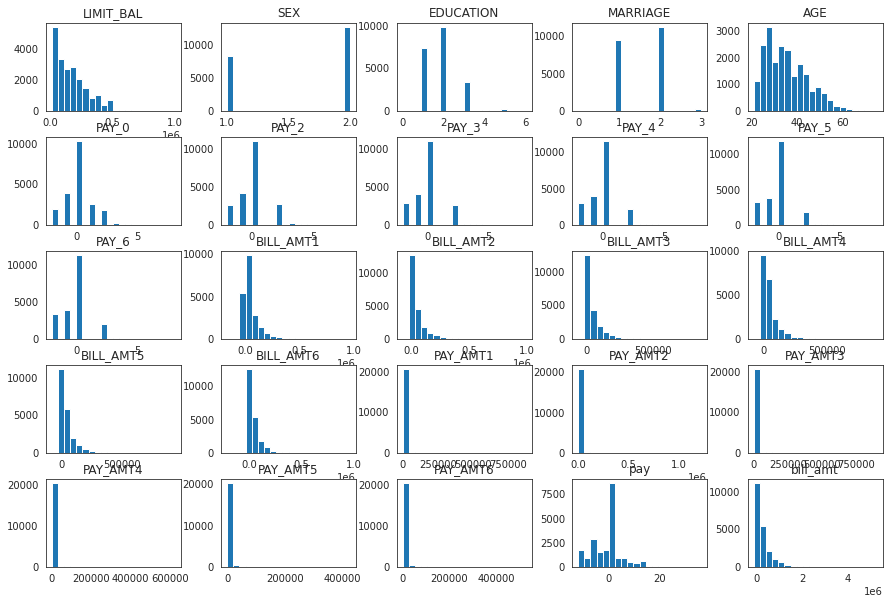

In [107]:
sns.set_style(style='white')
X_train.hist(figsize=(15, 10), bins=20, grid=False)
plt.show()

In [16]:
X_train.skew()

LIMIT_BAL     0.999384
SEX          -0.423501
EDUCATION     0.994205
MARRIAGE     -0.027035
AGE           0.733548
PAY_0         0.728328
PAY_2         0.803700
PAY_3         0.808713
PAY_4         0.905861
PAY_5         0.906568
PAY_6         0.864933
BILL_AMT1     2.665551
BILL_AMT2     2.733801
BILL_AMT3     2.738895
BILL_AMT4     2.831088
BILL_AMT5     2.930481
BILL_AMT6     2.898127
PAY_AMT1     15.829797
PAY_AMT2     21.766774
PAY_AMT3     19.104434
PAY_AMT4     12.485983
PAY_AMT5     10.925696
PAY_AMT6     10.054438
dtype: float64

In [20]:
train = X_train.merge(y_train, left_index=True, right_index=True)

In [25]:
corr = train.corr()
corr.iloc[:, -1]

LIMIT_BAL                    -0.159213
SEX                          -0.042592
EDUCATION                     0.024080
MARRIAGE                     -0.018953
AGE                           0.007442
PAY_0                         0.327370
PAY_2                         0.267821
PAY_3                         0.240649
PAY_4                         0.223032
PAY_5                         0.208392
PAY_6                         0.193506
BILL_AMT1                    -0.024878
BILL_AMT2                    -0.019810
BILL_AMT3                    -0.019245
BILL_AMT4                    -0.014071
BILL_AMT5                    -0.009466
BILL_AMT6                    -0.006929
PAY_AMT1                     -0.070114
PAY_AMT2                     -0.066631
PAY_AMT3                     -0.052702
PAY_AMT4                     -0.055853
PAY_AMT5                     -0.052220
PAY_AMT6                     -0.055074
default payment next month    1.000000
Name: default payment next month, dtype: float64

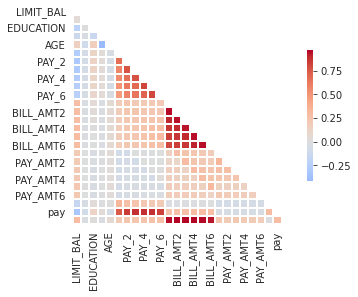

In [116]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.get_cmap('coolwarm'), center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .6})

plt.savefig('./report/heatmap.png', dpi=400)

In [117]:
train['pay'] = X_train.iloc[:, 5:11].sum(axis=1)/6
train['bill_amt'] = X_train.iloc[:, 11:17].sum(axis=1)/6

In [118]:
corr = train.corr()
corr.iloc[:, -3]

LIMIT_BAL                    -0.159213
SEX                          -0.042592
EDUCATION                     0.024080
MARRIAGE                     -0.018953
AGE                           0.007442
PAY_0                         0.327370
PAY_2                         0.267821
PAY_3                         0.240649
PAY_4                         0.223032
PAY_5                         0.208392
PAY_6                         0.193506
BILL_AMT1                    -0.024878
BILL_AMT2                    -0.019810
BILL_AMT3                    -0.019245
BILL_AMT4                    -0.014071
BILL_AMT5                    -0.009466
BILL_AMT6                    -0.006929
PAY_AMT1                     -0.070114
PAY_AMT2                     -0.066631
PAY_AMT3                     -0.052702
PAY_AMT4                     -0.055853
PAY_AMT5                     -0.052220
PAY_AMT6                     -0.055074
default payment next month    1.000000
pay                           0.288008
bill_amt                 

In [171]:
rndf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
extt_clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)

In [172]:
params = {
    'n_estimators': [200, 300],
    'max_features': ['log2', None],
    'max_leaf_nodes': [15, None]
}

In [176]:
estimators = {}
for estimator in [rndf_clf, extt_clf]:
    estimators[estimator.__class__.__name__] = GridSearchCV(estimator=estimator, param_grid=params, 
                                                                 n_jobs=-1, cv=5, return_train_score=True,
                                                                 scoring='f1').fit(X_train, np.ravel(y_train))
    

In [122]:
estimators.keys()

dict_keys(['RandomForestClassifier', 'ExtraTreesClassifier'])

In [177]:
for estimator in estimators.keys():
    print(f"{estimator} --- {estimators[estimator].best_score_}")

RandomForestClassifier --- 0.4807508024584779
ExtraTreesClassifier --- 0.48507909150910233


In [178]:
f1_score(np.ravel(y_train), np.ones(21_000))

0.36225385065314875

In [180]:
for estimator in estimators.keys():
    y_train_pred = cross_val_predict(estimators[estimator].best_estimator_, X_train_scaled, np.ravel(y_train), cv=3)
    print(f'{estimator}')
    print(confusion_matrix(np.ravel(y_train), y_train_pred))

RandomForestClassifier
[[15390   965]
 [ 2896  1749]]
ExtraTreesClassifier
[[15514   841]
 [ 2873  1772]]


In [181]:
for estimator in estimators.keys():
    print(f"{estimator} --- {estimators[estimator].best_params_}")

RandomForestClassifier --- {'max_features': None, 'max_leaf_nodes': None, 'n_estimators': 300}
ExtraTreesClassifier --- {'max_features': None, 'max_leaf_nodes': 15, 'n_estimators': 300}


In [128]:
list(zip(X_train.columns, estimators['ExtraTreesClassifier'].best_estimator_.feature_importances_))

[('LIMIT_BAL', 0.019436153159714264),
 ('SEX', 3.9948488415302855e-05),
 ('EDUCATION', 0.000729921446251197),
 ('MARRIAGE', 3.861868546517404e-05),
 ('AGE', 0.0010282575485548021),
 ('PAY_0', 0.47121618704587515),
 ('PAY_2', 0.20706464780088363),
 ('PAY_3', 0.11833447477295722),
 ('PAY_4', 0.06367822669861258),
 ('PAY_5', 0.06167371606413921),
 ('PAY_6', 0.044296033889095164),
 ('BILL_AMT1', 0.0018335921799267924),
 ('BILL_AMT2', 0.0005315239028176776),
 ('BILL_AMT3', 0.001166818684667548),
 ('BILL_AMT4', 0.0010986238854777735),
 ('BILL_AMT5', 0.0013808506306511703),
 ('BILL_AMT6', 0.0009005135999347864),
 ('PAY_AMT1', 0.0012984936720478227),
 ('PAY_AMT2', 0.0005536961355130343),
 ('PAY_AMT3', 0.0015026753695889965),
 ('PAY_AMT4', 0.0007708487480346874),
 ('PAY_AMT5', 0.0007593274375392956),
 ('PAY_AMT6', 0.0006668501538367053)]

In [129]:
list(zip(X_train.columns, estimators['RandomForestClassifier'].best_estimator_.feature_importances_))

[('LIMIT_BAL', 0.06004271616866443),
 ('SEX', 0.011875802705393526),
 ('EDUCATION', 0.019912167443894305),
 ('MARRIAGE', 0.013636645777314509),
 ('AGE', 0.06608672862100334),
 ('PAY_0', 0.09848578345447712),
 ('PAY_2', 0.04157438262329414),
 ('PAY_3', 0.02657353216276674),
 ('PAY_4', 0.023894403172981978),
 ('PAY_5', 0.02278330450582164),
 ('PAY_6', 0.022949106200871712),
 ('BILL_AMT1', 0.05952642251107663),
 ('BILL_AMT2', 0.05388227934919704),
 ('BILL_AMT3', 0.051233530213919985),
 ('BILL_AMT4', 0.05011281624641546),
 ('BILL_AMT5', 0.049465486263376914),
 ('BILL_AMT6', 0.05073825521332384),
 ('PAY_AMT1', 0.05047009675061275),
 ('PAY_AMT2', 0.04790282592759201),
 ('PAY_AMT3', 0.04625969202605325),
 ('PAY_AMT4', 0.043381886405523415),
 ('PAY_AMT5', 0.04362203372806734),
 ('PAY_AMT6', 0.04559010252835784)]

In [163]:
X_train['log_limit_bal'] = np.log1p(X_train['LIMIT_BAL'])

In [164]:
X_train.drop(labels=['LIMIT_BAL'], axis=1, inplace=True)

In [137]:
train = X_train.merge(y_train, left_index=True, right_index=True)
train.corr()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,log_limit_bal,default payment next month
SEX,1.000000,0.007141,-0.031797,-0.092993,-0.063384,-0.029792,-0.000741,-0.006204,-0.001941,-0.000358,0.003239,-0.003829,0.076398,-0.042592
EDUCATION,0.007141,1.000000,-0.142210,0.168914,0.109288,0.029202,-0.032029,-0.026379,-0.038094,-0.044509,-0.036421,-0.033139,-0.218835,0.024080
MARRIAGE,-0.031797,-0.142210,1.000000,-0.412734,0.021073,-0.023473,-0.009752,-0.009655,0.000083,-0.010333,-0.004612,-0.008814,-0.124224,-0.018953
AGE,-0.092993,0.168914,-0.412734,1.000000,-0.038690,0.056000,0.032147,0.028545,0.026337,0.026664,0.030101,0.024031,0.142317,0.007442
PAY_0,-0.063384,0.109288,0.021073,-0.038690,1.000000,0.184698,-0.078706,-0.073429,-0.068080,-0.067495,-0.060391,-0.060274,-0.284843,0.327370
BILL_AMT1,-0.029792,0.029202,-0.023473,0.056000,0.184698,1.000000,0.142963,0.108812,0.165701,0.159850,0.172131,0.181459,0.288787,-0.024878
PAY_AMT1,-0.000741,-0.032029,-0.009752,0.032147,-0.078706,0.142963,1.000000,0.326614,0.270848,0.229555,0.149664,0.213823,0.175667,-0.070114
PAY_AMT2,-0.006204,-0.026379,-0.009655,0.028545,-0.073429,0.108812,0.326614,1.000000,0.281688,0.225327,0.149662,0.185917,0.164158,-0.066631
PAY_AMT3,-0.001941,-0.038094,0.000083,0.026337,-0.068080,0.165701,0.270848,0.281688,1.000000,0.242111,0.144324,0.176423,0.174627,-0.052702
PAY_AMT4,-0.000358,-0.044509,-0.010333,0.026664,-0.067495,0.159850,0.229555,0.225327,0.242111,1.000000,0.138113,0.170479,0.181282,-0.055853


In [138]:
from sklearn.preprocessing import StandardScaler

In [165]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [147]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [189]:
svm_clf = LinearSVC(random_state=42, loss='hinge')
log_clf = LogisticRegression(random_state=42, n_jobs=-1)
knn_clf = KNeighborsClassifier(n_jobs=-1)

In [190]:
params_svm = {
    'C': [10e-4, 10e-3, 10e-2, 10e-1, 1]
}

params_log = {
    'C': [10e-4, 10e-3, 10e-2, 10e-1, 1]
}

params_knn = {
    'n_neighbors': [4, 5, 6],
    'weights': ['uniform', 'distance']
}

In [191]:
estimators = {}
for estimator in [(svm_clf, params_svm), (log_clf, params_log), (knn_clf, params_knn)]:
    estimators[estimator[0].__class__.__name__] = GridSearchCV(estimator=estimator[0], param_grid=estimator[1], 
                                                            n_jobs=-1, cv=5, return_train_score=True,
                                                            scoring='f1').fit(X_train_scaled , np.ravel(y_train))

In [192]:
for estimator in estimators.keys():
    print(f"{estimator} --- {estimators[estimator].best_params_}")

LinearSVC --- {'C': 0.1}
LogisticRegression --- {'C': 1.0}
KNeighborsClassifier --- {'n_neighbors': 5, 'weights': 'distance'}


In [167]:
for estimator in estimators.keys():
    print(f"{estimator} --- {estimators[estimator].best_score_}")

LinearSVC --- 0.3814685408450716
LogisticRegression --- 0.37011871472775587
KNeighborsClassifier --- 0.4256177670640481


In [206]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
for estimator in estimators.keys():
    y_train_pred = cross_val_predict(estimators[estimator].best_estimator_, X_train_scaled, np.ravel(y_train), cv=3)
    print(f'{estimator}')
    print(confusion_matrix(np.ravel(y_train), y_train_pred))

LinearSVC
[[15757   598]
 [ 3413  1232]]
LogisticRegression
[[15876   479]
 [ 3477  1168]]
KNeighborsClassifier
[[15006  1349]
 [ 3001  1644]]


In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [184]:
y_train_pred = cross_val_predict(ada_clf, X_train, np.ravel(y_train), cv=3)

In [185]:
confusion_matrix(np.ravel(y_train), y_train_pred)

array([[15585,   770],
       [ 3040,  1605]])

In [187]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
y_train_pred = cross_val_predict(gbrt, X_train, np.ravel(y_train), cv=3)
confusion_matrix(np.ravel(y_train), y_train_pred)

array([[15511,   844],
       [ 2926,  1719]])

In [188]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [207]:
svm_clf = LinearSVC(random_state=42, loss='hinge', C=0.1)
log_clf = LogisticRegression(random_state=42, n_jobs=-1, C=1)
knn_clf = KNeighborsClassifier(n_jobs=-1, n_neighbors= 5, weights= 'distance')

In [208]:

voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('log', log_clf), ('knn', knn_clf)],
                             voting='hard')

In [200]:
y_train_pred = cross_val_predict(voting_clf, X_train_scaled, np.ravel(y_train), cv=3)
confusion_matrix(np.ravel(y_train), y_train_pred)

array([[15818,   537],
       [ 3372,  1273]])

In [209]:
y_score = cross_val_score(voting_clf, X_train_scaled, np.ravel(y_train), cv=3, scoring='f1')

In [211]:
y_score.mean()

0.3940509626288053

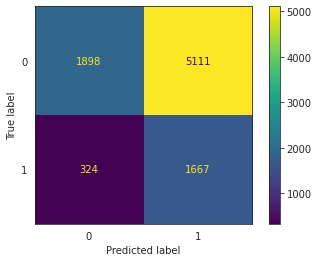

In [215]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
extt_clf = ExtraTreesClassifier(random_state=42, n_jobs=-1, max_features= None, max_leaf_nodes= 15, n_estimators= 300)
extt_clf.fit(X_train, np.ravel(y_train))

X_test = pd.read_parquet('data/x_test.parquet')
y_test = pd.read_parquet('data/y_test.parquet')

y_test_pred = extt_clf.predict(X_test)
         
cm = confusion_matrix(np.ravel(y_test), y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig('./report/confusion.png', dpi=400)